In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd

[16.499206484813328, 17.535419532038496, 17.61052781033198, 17.512489048193807, 17.58934731378514, 17.662809492180276, 17.600656281977415, 17.439534018745345, 17.474028106192726, 17.5882286648677, 17.572440290204067, 17.63165073463939, 17.43554874819797, 17.566821258742984, 17.378597533851927, 17.630762353740796, 17.478617034792673, 17.500393660682192, 17.46257299045628, 17.37834796279792, 17.603608225564532, 17.47301578029803, 17.418908744722984, 17.388416200501954, 17.30326675602125, 17.534063333050497, 17.348222651730662, 17.456215624813346, 17.376305477895144, 17.454990244268295, 17.43238955157767, 17.528426224854222, 17.451526193513097, 17.650688158670906, 17.51780920725613, 17.41457861901375, 17.456163031612743, 17.424588886817716, 17.53744117023209, 17.38607653519306, 17.479815950732817, 17.37661450816973, 17.417805778827525, 17.41581652964875, 17.398101095946625, 17.32274329868615, 17.405662039833725, 17.4320388853688, 17.42054263827208, 17.439661567895556, 17.378958481031386, 

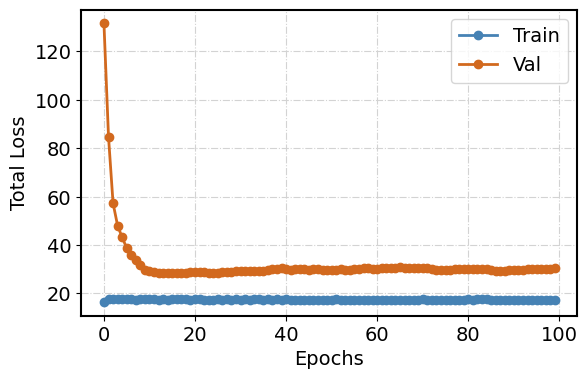

In [6]:
# data = jnp.load('../DiracNPC/residual.npy')
# train = pd.read_csv('../DiracNPC/log/trainloss.csv').iloc[:,-1]
# val = pd.read_csv('../DiracNPC/log/valLoss.csv').iloc[:,-1]
import pickle
with open('../logs/2024-02-23-07_trainLog.pkl', 'rb') as f:
    log = pickle.load(f)
train = log['TrainLoss']
val = log['ValLoss']
print(train)

fig, ax = plt.subplots()
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.size'] = 14
ax.set_box_aspect(1/1.62)
ax.grid(True, color='lightgray', linestyle='-.')
ax.plot(train, color='steelblue', marker='o', label='Train')
ax.plot(val, color='chocolate', marker='o', label='Val')
ax.set_xlabel('Epochs')
ax.set_ylabel('Total Loss')
xmin, xmax = ax.get_xlim()
#ax.set_xlim(-10,300)
#ax.set_ylim(400, 800)
ax.legend()
fig.savefig('../figures/2024-02-23-07_trainLog.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 1.0, 'Residual at step 20')

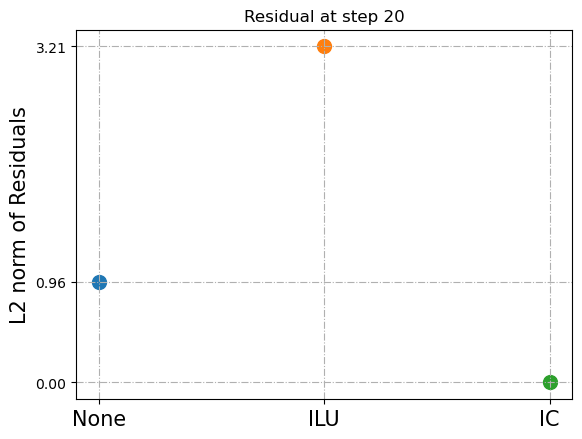

In [10]:
fig, ax = plt.subplots()
ax.scatter(0, 0.96, s=100)
ax.scatter(1, 3.21, s=100)
ax.scatter(2, 3.7e-14, s=100)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['None', 'ILU', 'IC'], fontsize=15)
ax.set_yticks([0.96, 3.21, 3.7e-14])
ax.set_ylabel('L2 norm of Residuals', fontsize=15)
ax.grid(True, linestyle='-.')
ax.set_title('Residual at step 20')

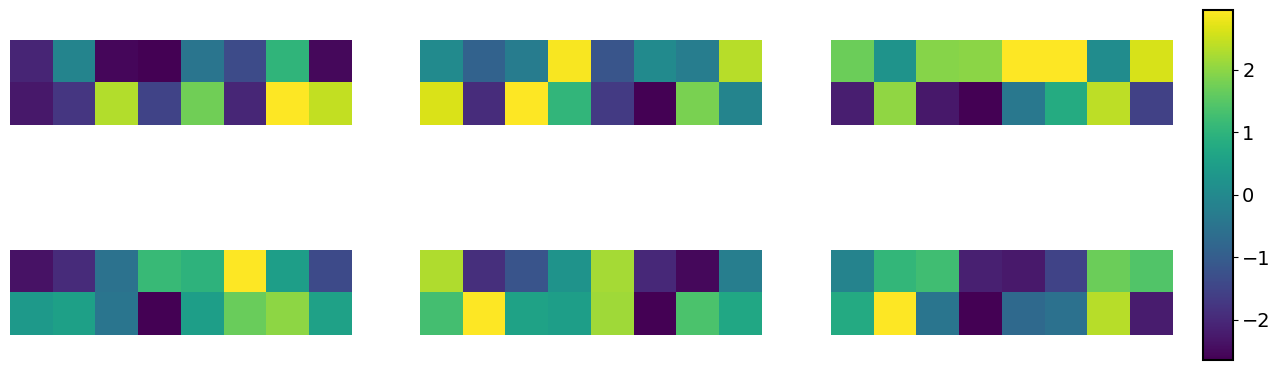

In [18]:
# visualize some U1 fields
import numpy as np

U1 = np.load(
    "../../datasets/Dirac/precond_data/config.l8-N1600-b2.0-k0.276-unquenched.x.npy"
)
U1 = np.asarray(U1)

fig, ax = plt.subplots(2,3, figsize=(15, 5))
for i in range(3):
    for j in range(2):
        im=ax[j, i].imshow(U1[i, :, :, j], cmap='viridis')
        ax[j, i].axis('off')
    # add a common colorbar to all subplots, make sure they share the same color range
fig.subplots_adjust(right=0.9)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.savefig('../figures/U1_fields.pdf', format='pdf', bbox_inches='tight')

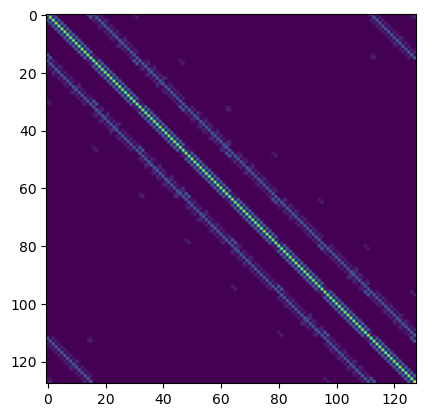

In [5]:
# plot the generated dd matrices
import torch

dd_matrices = torch.load('../data/DD_matrices.pt')

fig, ax = plt.subplots()
ax.imshow(dd_matrices[0].abs())
                         

In [8]:

A = dd_matrices[0]

def IC(A):
    mask = A.abs() == 0
    L = torch.cholesky(A)
    L[mask] = 0
    return L


In [15]:
# make datasets
IC_data = {'A': [], 'L_IC':[]}
for i in range(dd_matrices.shape[0]):
    L = IC(dd_matrices[i])
    IC_data['A'].append(dd_matrices[i])
    IC_data['L_IC'].append(L)
    

torch.save(IC_data, '../data/DD_mat_IC_L.pt')

In [20]:
print(dd_matrices.shape)
A = torch.stack(IC_data['A'])
L = torch.stack(IC_data['L_IC'])
print(A.shape, L.shape)
mask_A = A[0].abs() != 0
A_ = A[:,mask_A]
L_ = L[:, L[0].abs() != 0]
print(A_.shape, L_.shape)

torch.Size([1600, 128, 128])
torch.Size([1600, 128, 128]) torch.Size([1600, 128, 128])
torch.Size([1600, 1792]) torch.Size([1600, 960])
